In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [2]:
# Generators
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/train',
    labels =  'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/test',
    labels =  'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [3]:
# normalizing 
def process(image, label):
    image = tf.cast(image/255., tf.float32)
    return image, label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [4]:
# create CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary() 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [7]:
history = model.fit(train_ds, epochs = 10, validation_data=test_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.5612 - loss: 0.6993 - val_accuracy: 0.7008 - val_loss: 0.5838
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.7179 - loss: 0.5527 - val_accuracy: 0.7540 - val_loss: 0.5161
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.8129 - loss: 0.4088 - val_accuracy: 0.7682 - val_loss: 0.5950
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.8924 - loss: 0.2514 - val_accuracy: 0.7642 - val_loss: 0.8423
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.9477 - loss: 0.1406 - val_accuracy: 0.7662 - val_loss: 1.0920
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.9723 - loss: 0.0781 - val_accuracy: 0.7572 - val_loss: 1.2515
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.9806 - loss: 0.0647 - val_accuracy: 0.7534 - val_loss: 1.2850
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.9852 - loss: 0.0441 - 

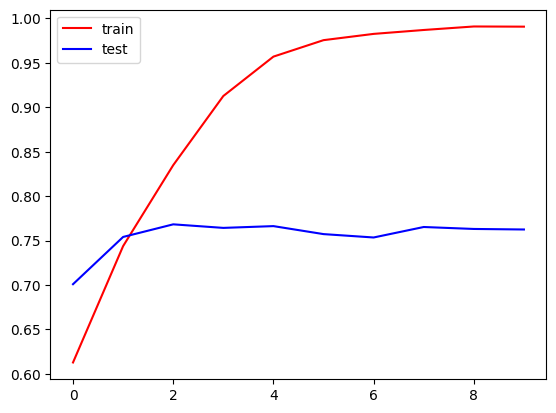

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='test')
plt.legend()
plt.show()

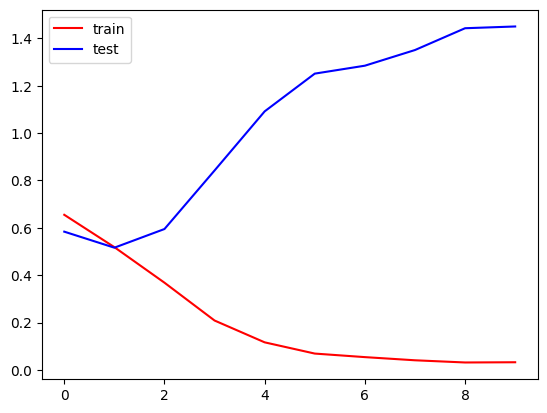

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='test')
plt.legend()
plt.show()

Overfitting ka case hai

In [27]:
model2 = Sequential()
model2.add(Conv2D(10, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model2.add(Conv2D(20, kernel_size=(3,3), padding='valid', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model2.add(Conv2D(40, kernel_size=(3,3), padding='valid', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model2.add(Conv2D(80, kernel_size=(3,3), padding='valid', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model2.add(Flatten())

model2.add(Dense(80, activation='relu'))
model.add(Dropout(0.1))
model2.add(Dense(40, activation='relu'))
model.add(Dropout(0.1))
model2.add(Dense(20, activation='relu'))
model.add(Dropout(0.1))
model2.add(Dense(10, activation='relu'))
model.add(Dropout(0.1))
model2.add(Dense(1, activation='sigmoid'))

In [28]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 254, 254, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 254, 254, 10)        │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 127, 127, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 125, 125, 20)        │           1,820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 125, 125, 20)        │              80 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 62, 62, 20)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 60, 60, 40)          │           7,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 60, 60, 40)          │             160 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 30, 40)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 80)          │          28,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 28, 28, 80)          │             320 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 80)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 15680)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 80)                  │       1,254,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 40)                  │           3,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 20)                  │             820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,297,581 (4.95 MB)

 Trainable params: 1,297,281 (4.95 MB)

 Non-trainable params: 300 (1.17 KB)

In [29]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
history2 = model2.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - accuracy: 0.6360 - loss: 0.6534 - val_accuracy: 0.7272 - val_loss: 0.5214
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.7757 - loss: 0.4629 - val_accuracy: 0.7860 - val_loss: 0.4648
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.8358 - loss: 0.3640 - val_accuracy: 0.7226 - val_loss: 0.7447
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.8822 - loss: 0.2716 - val_accuracy: 0.8280 - val_loss: 0.4494
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.9221 - loss: 0.1879 - val_accuracy: 0.8494 - val_loss: 0.4414
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.9486 - loss: 0.1315 - val_accuracy: 0.8546 - val_loss: 0.5447
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9727 - loss: 0.0736 - val_accuracy: 0.7916 - val_loss: 1.0377
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9794 - loss: 0.0545 - 

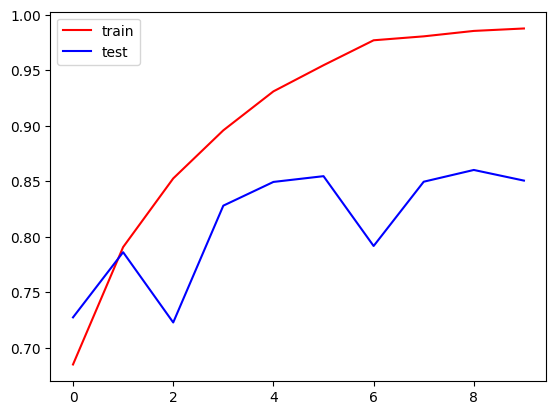

In [31]:
import matplotlib.pyplot as plt
plt.plot(history2.history['accuracy'], color='red', label='train')
plt.plot(history2.history['val_accuracy'], color='blue', label='test')
plt.legend()
plt.show()

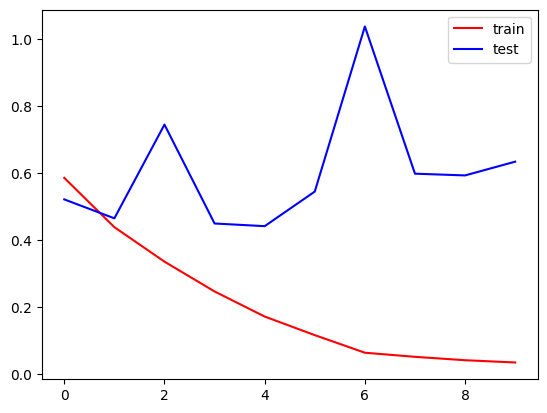

In [32]:
plt.plot(history2.history['loss'], color='red', label='train')
plt.plot(history2.history['val_loss'], color='blue', label='test')
plt.legend()
plt.show()

In [63]:
import cv2
from skimage import io

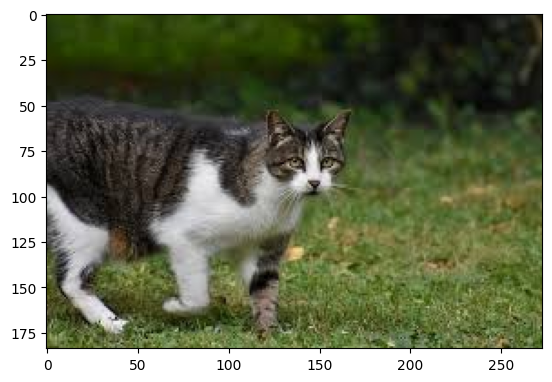

In [65]:
image = io.imread("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQC7opi_qBkahWNalgm4r-bSILzpss3lKRBSw&s")
plt.imshow(image)
plt.show()

In [54]:
test_img = cv2.imread("/kaggle/input/dogs-vs-cats/test/cats/cat.10048.jpg")
test_img2 = cv2.imread("/kaggle/input/dogs-vs-cats/train/dogs/dog.10024.jpg")

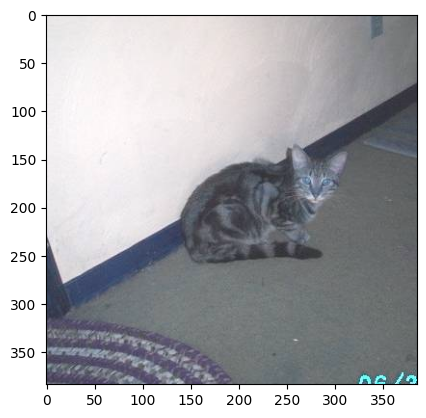

In [50]:
plt.imshow(test_img)

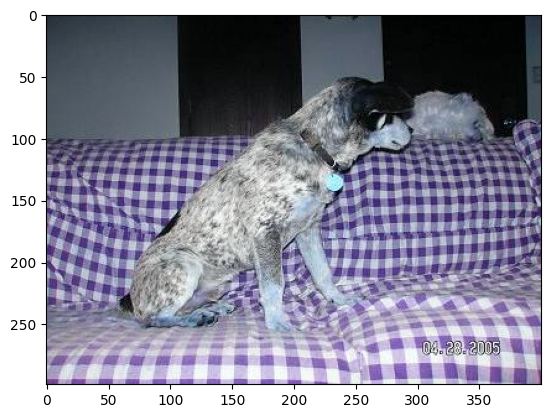

In [55]:
plt.imshow(test_img2)

In [56]:
test_img.shape

(384, 385, 3)

In [57]:
test_img2.shape

(299, 400, 3)

In [66]:
image.shape

(184, 273, 3)

In [67]:
test_img = cv2.resize(test_img, (256,256))
test_img2 = cv2.resize(test_img2, (256,256))
test_img3 = cv2.resize(image, (256,256))

In [68]:
test_ipt = test_img.reshape((1,256,256,3))
test_ipt2 = test_img2.reshape((1,256,256,3))
test_ipt3 = test_img3.reshape((1,256,256,3))

In [69]:
print(model.predict(test_ipt))
print(model.predict(test_ipt2))
print(model.predict(test_ipt3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[0.]]


In [71]:
print(model2.predict(test_ipt))
print(model2.predict(test_ipt2))
print(model2.predict(test_ipt3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[1.]]


surprisingly model is performing much better than model2 despite low accuracy.